<a href="https://colab.research.google.com/github/mrinal054/deep_learning_machine_learning/blob/master/tensorflow/utils/demo/tf_dataloader_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note**
* Copy `aug2d.py` file from https://github.com/mrinal054/my_utils 
* Keep `aug2d.py` and `dataloader.py` in the same directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/GitHub/dataLoader')

In [ ]:
import tensorflow
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
from aug2d import Augmentor2d
from dataloader import DataGenerator
import os
import random

Performing rotation with angle 17


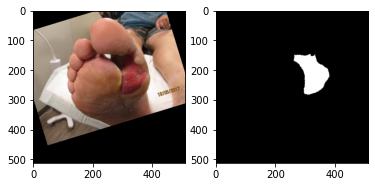

In [ ]:
# Example
import matplotlib.pyplot as plt

img_dir_train = '/content/drive/MyDrive/Colab Notebooks/GitHub/dataLoader/dataset/images'
mask_dir_train = '/content/drive/MyDrive/Colab Notebooks/GitHub/dataLoader/dataset/labels'

list_IDs_train = os.listdir(img_dir_train)

# Parameters
params = {'dim': (512,512), # (height, width)
          'batch_size': 1,
          'n_classes': 2,
          'n_channels_image': 3,
          'n_channels_mask': 1,
          'shuffle': False,
          'extensions': ('.png', '.png'),
          'to_categorical': False, # set it to true if you want categorical format, otherwise false.
          'do_normalization': (True,True),
          'do_augmentation': True, # to do on-the-fly augmentation, set it to true. 
          'aug_list': [None, 'rotate', 'flip', 'shift', 'zoom', 'shear'], # add types of augmenation you want. 
          'aug_per_call': 1, # no. of unique augmentations in each call
          'rotate_range': 30, # set rotation angle between +rotate_range to -rotate_range
          'flip_axis': 'random', # set 0, 1 or 'random'
          'shift_range': (75, 75), # shift between +shift_range to -shift_range
          'zoom_range': (0.5, 1.8), # Ensure zoom_range[0]<=0.9 and zoom_range[1]>=1.1
          'shear_range': 0.25, # shear between +shear_range and -shear_range
          'verbose': True, # set to False for training. Otherwise, it will print status. 
          }

train_gen = DataGenerator(list_IDs=list_IDs_train,
                          dir_image=img_dir_train,
                          dir_mask=mask_dir_train,
                          **params)

iters = iter(train_gen)

a,b = next(iters)

fig, ax = plt.subplots(1,2)
ax[0].imshow(np.squeeze(a)) # uncomment if normalization is True
# ax[0].imshow(np.squeeze(a.astype(np.uint8))) # uncomment if normalization is False
ax[1].imshow(np.squeeze(b), cmap='gray')

#### Image credit

https://github.com/uwm-bigdata/wound-segmentation